# Who is most likely to have a bank account?






# Loading libraries/Dependancies

In [909]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix


# Loading the dataset

In [910]:
training_data = pd.read_csv('D:/ML/Projects/Financial inclusion in africa/Train_v2.csv')
testing_data = pd.read_csv('D:/ML/Projects/Financial inclusion in africa/Test_v2.csv')


In [911]:
print(training_data.head(2))
print(testing_data.head(2))

  country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   

  relationship_with_head           marital_status      education_level  \
0                 Spouse  Married/Living together  Secondary education   
1      Head of Household                  Widowed  No formal education   

               job_type  
0         Self employed  
1  Government Dependent  
  country  year       uniqueid location_type cellphone_access  household_size  \
0   Kenya  2018  uniqueid_6056         Urban              Yes               3   
1   Kenya  2018  uniqueid_6060         Urban              Yes               7   

   age_of_respondent gender_of_respondent rel

In [912]:
# Number of observations(rows) and features(columns) in the training set
training_data.shape

(23524, 13)

In [913]:
# Number of observations(rows) and features(columns) in the testing set
testing_data.shape

(10086, 12)

In [914]:
# Checking the specific columns
training_data.columns.tolist()
testing_data.columns.tolist()

['country',
 'year',
 'uniqueid',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

# Data Wrangling/Preprocessing

Setting a Unique identifier

In [915]:
# unique_id + x + country
id = training_data['uniqueid'] +' x ' +training_data['country']
id = testing_data['uniqueid'] +' x ' +testing_data['country']

In [916]:
id.to_frame().head()

,0
0,uniqueid_6056 x Kenya
1,uniqueid_6060 x Kenya
2,uniqueid_6065 x Kenya
3,uniqueid_6072 x Kenya
4,uniqueid_6073 x Kenya


In [917]:
# inserting the id into the dataset
training_data.insert(0,'id',id)
testing_data.insert(0,'id',id)

In [918]:
training_data.head()

,id,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,uniqueid_6056 x Kenya,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,uniqueid_6060 x Kenya,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,uniqueid_6065 x Kenya,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,uniqueid_6072 x Kenya,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,uniqueid_6073 x Kenya,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [919]:
# Deleting the country & uniqueid from the dataset
training_data = training_data.drop(training_data[['country','uniqueid']],axis = 1)
testing_data = testing_data.drop(testing_data[['country','uniqueid']],axis = 1)

In [920]:
training_data.head()

,id,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,uniqueid_6056 x Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,uniqueid_6060 x Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,uniqueid_6065 x Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,uniqueid_6072 x Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,uniqueid_6073 x Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [921]:
testing_data.head()

,id,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,uniqueid_6056 x Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,uniqueid_6060 x Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,uniqueid_6065 x Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,uniqueid_6072 x Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,uniqueid_6073 x Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [922]:
# setting id as index

testing_data.set_index('id', inplace = True)

In [923]:
training_data.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
id,,,,,,,,,,,
uniqueid_6056 x Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
uniqueid_6060 x Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
uniqueid_6065 x Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
uniqueid_6072 x Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
uniqueid_6073 x Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Visualization

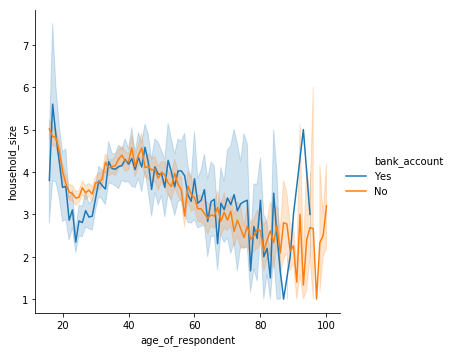

In [924]:
# relational plotting
sb.relplot(x = 'age_of_respondent',y = 'household_size',hue = 'bank_account',kind = 'line',data = training_data)
# plot show that more midle age people who are in the Urban area have bank accounts

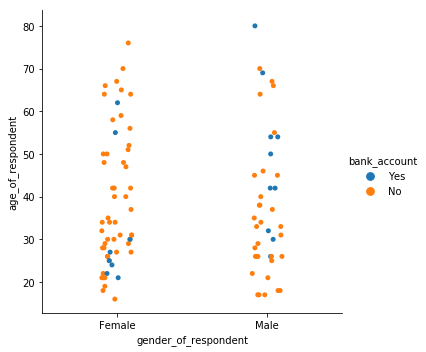

In [925]:
sb.catplot(x = 'gender_of_respondent', y = 'age_of_respondent',hue = 'bank_account', data = training_data[:100])
# Categorical plot shows that more women under the age of 30 have bank accounts
# and more men above 30 have bank accounts

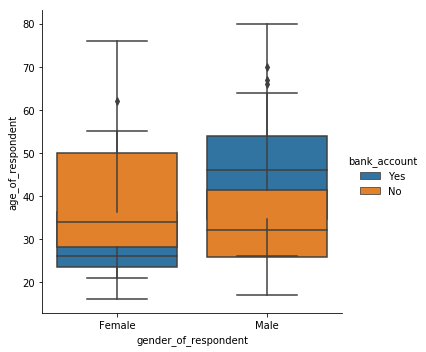

In [926]:
sb.catplot(x = 'gender_of_respondent', y = 'age_of_respondent',hue = 'bank_account', data = training_data[:100],kind = 'box', dodge = False)

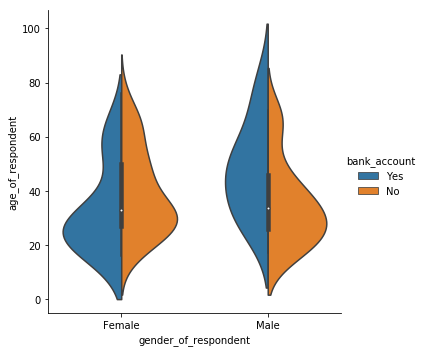

In [927]:
sb.catplot(x = 'gender_of_respondent', y = 'age_of_respondent',hue = 'bank_account', data = training_data[:100],kind = 'violin', split = True)

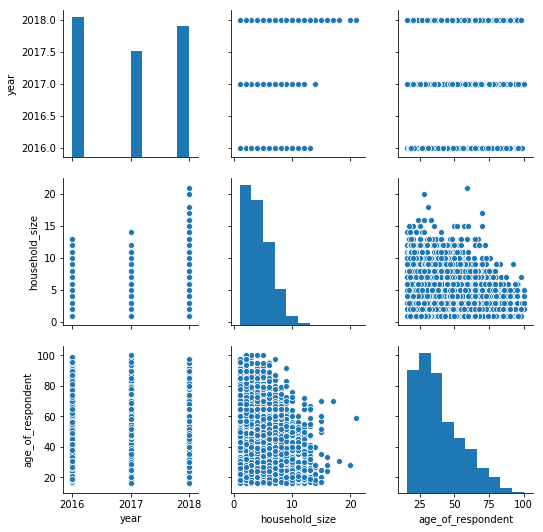

In [928]:
sb.pairplot(training_data)

In [929]:
# testing_data.head()

In [930]:
training_data['gender_of_respondent'].value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

Checking for missing data

In [931]:
training_data.isnull().sum()

year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [932]:
testing_data.isnull().sum()

year                      0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Handling Categorical Data


In [933]:
# Categorical boolean mask
categorical_training_mask = training_data.dtypes == object
categorical_testing_mask = testing_data.dtypes == object
categorical_cols = training_data.columns[categorical_training_mask].tolist()
categorical_col = testing_data.columns[categorical_testing_mask].tolist()

In [934]:
categorical_cols

['bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [935]:
# Categorizing data using label encoder
label_encoder = LabelEncoder()
training_data[categorical_cols] = training_data[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))
testing_data[categorical_col] = testing_data[categorical_col].apply(lambda col: label_encoder.fit_transform(col))

training_data.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
id,,,,,,,,,,,
uniqueid_6056 x Kenya,2018,1,0,1,3,24,0,5,2,3,9
uniqueid_6060 x Kenya,2018,0,0,0,5,70,0,1,4,0,4
uniqueid_6065 x Kenya,2018,1,1,1,5,26,1,3,3,5,9
uniqueid_6072 x Kenya,2018,0,0,1,5,34,0,1,2,2,3
uniqueid_6073 x Kenya,2018,0,1,0,8,26,1,0,3,2,5


In [936]:
testing_data.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
id,,,,,,,,,,
uniqueid_6056 x Kenya,2018,1,1,3,30,1,1,2,3,2
uniqueid_6060 x Kenya,2018,1,1,7,51,1,1,2,5,3
uniqueid_6065 x Kenya,2018,0,0,3,77,0,4,2,0,8
uniqueid_6072 x Kenya,2018,0,0,6,39,0,1,2,2,8
uniqueid_6073 x Kenya,2018,1,0,3,16,1,0,3,3,8


In [937]:
# categorizing the year too
training_data['year'] = label_encoder.fit_transform(training_data['year'])
testing_data['year'] = label_encoder.fit_transform(testing_data['year'])

In [938]:
testing_data

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
id,,,,,,,,,,
uniqueid_6056 x Kenya,2,1,1,3,30,1,1,2,3,2
uniqueid_6060 x Kenya,2,1,1,7,51,1,1,2,5,3
uniqueid_6065 x Kenya,2,0,0,3,77,0,4,2,0,8
uniqueid_6072 x Kenya,2,0,0,6,39,0,1,2,2,8
uniqueid_6073 x Kenya,2,1,0,3,16,1,0,3,3,8
uniqueid_6074 x Kenya,2,0,1,4,25,0,5,2,2,9
uniqueid_6075 x Kenya,2,0,1,4,32,0,1,0,2,5
uniqueid_6076 x Kenya,2,1,1,3,24,0,5,2,5,9
uniqueid_6077 x Kenya,2,0,1,4,22,0,0,3,2,5


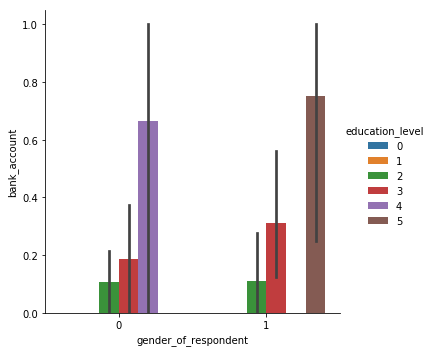

In [939]:
sb.catplot(x = 'gender_of_respondent', y = 'bank_account', kind = 'bar',hue = 'education_level',data = training_data[:100])

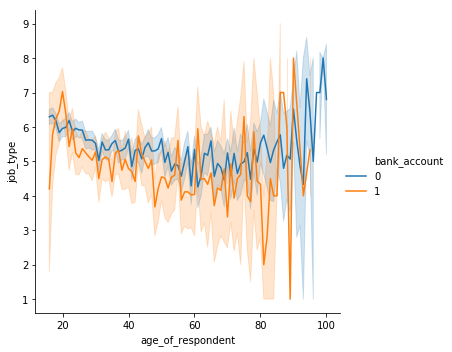

In [940]:
sb.relplot(x = 'age_of_respondent',y = 'job_type',hue = 'bank_account',kind = 'line',data = training_data)


# Model Selection

Feature Scaling using StandardScaler

In [941]:
# scaler = StandardScaler()
# features_train = scaler.fit_transform(features_train)
# # target_train = scaler.fit_transform(target_train)
# features_test = scaler.fit_transform(testing_data)

In [942]:
# features_test

In [943]:
# features_train

Feature Scaling using Normalizer

In [944]:
# scaler = Normalizer()
# features_train = scaler.fit_transform(features_train)
# # target_train = scaler.fit_transform(target_train)
# features_test = scaler.transform(testing_data)

In [945]:
# features_test.shape

Dimensionality reduction using feature extraction

In [946]:
# # Create a PCA that will retain 99% of variance
# pca = PCA(n_components=0.99, whiten=True)
# # Conduct PCA
# features_pca = pca.fit_transform(features_train)
# print(features_pca.shape)
# print(features_train.shape)

In [947]:
# # Apply kernal PCA with radius basis function (RBF) kernel
# kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
# features_kpca = kpca.fit_transform(features_train)
# features_kpca.shape

Dimensionality reduction using feature selection

In [948]:
# # Create thresholder
# thresholder = VarianceThreshold(threshold=.5)
# # Create high variance feature matrix
# features_high_variance = thresholder.fit_transform(features_train)
# features_high_variance.shape

Selecting Best Models Using Exhaustive Search

1.Using scikit-learn’s GridSearchCV

In [949]:
# # Create logistic regression
# model = LogisticRegression()
# # model = RandomForestClassifier()
# # param_grid = {'n_estimators': [10,50,100]}
# # Create random forest classifier object
# # Create range of candidate penalty hyperparameter values
# penalty = ['l1', 'l2']
# # Create range of candidate regularization hyperparameter values
# C = np.logspace(0, 4, 10)
# # Create dictionary hyperparameter candidates
# hyperparameters = dict(C=C, penalty=penalty)
# # Create grid search
# gridsearch = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
# # gridsearch = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, verbose=0)
# # Fit grid search
# best_model = gridsearch.fit(features_pca, target_train)
# # best_model = gridsearch.fit(features_high_variance, target_train)



Selecting Best Models from Multiple Learning
Algorithms

In [950]:
# # View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])
# # print('Best param_grid:', best_model.best_estimator_.get_params())

In [951]:
# # Predict target vector
# best_model.predict(features_pca)
# # best_model.predict(features_high_variance)

2.Selecting Best Models Using Randomized Search

In [952]:
#  model = LogisticRegression()
# # Create range of candidate regularization penalty hyperparameter values
# penalty = ['l1', 'l2']
# # Create distribution of candidate regularization hyperparameter values
# C = uniform(loc=0, scale=4)
# # Create hyperparameter options
# hyperparameters = dict(C=C, penalty=penalty)
# # Create randomized search
# randomizedsearch = RandomizedSearchCV(
# model, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0,
# n_jobs=-1)
# # Fit randomized search
# best_model = randomizedsearch.fit(features_pca, target_train)

In [953]:
# # View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

In [954]:
# # Predict target vector
# best_model.predict(features_pca)

# Model Evaluation

Cross-Validating Models

In [955]:
# # Create k-Fold cross-validation
# kf = KFold(n_splits=10, shuffle=True, random_state=1)
# # Conduct k-fold cross-validation
# cv_results = cross_val_score(model, # model
# features_pca, # Feature matrix
# target_train, # Target vector
# cv=kf, # Cross-validation technique
# scoring="accuracy", # Loss function
# n_jobs=-1) # Use all CPU scores
# # Calculate mean
# cv_results.mean()

In [956]:
# cv_results

In [957]:
# model.fit(features_pca,target_train)

In [958]:
# y_pred = model.predict(features_test)

In [959]:
# model.predict_proba(features_test)

In [960]:
# y_pred